<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Tensorboard Demo 

References: 

- https://keras.io/examples/mnist_cnn/
- https://www.tensorflow.org/tensorboard/r2/get_started

plots 
- https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib
- https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib



Run this from the terminal 

`tensorboard --logdir ./tensorboard`

and visit: 

`http://localhost:6006`

In [5]:
import tensorflow
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
# from keras.callbacks import TensorBoard
from keras import callbacks

In [42]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array,array_to_img
import matplotlib.pyplot as plt
from keras.callbacks import LambdaCallback
import numpy as np

In [14]:
tbCallBack = keras.callbacks.TensorBoard(
    log_dir='./tensorboard'
    , histogram_freq=0
    , write_graph=True
    , write_images=True)

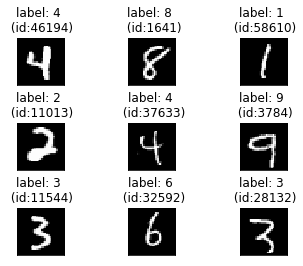

In [125]:
    
fig, ax = plt.subplots(nrows=3, ncols=3)
plt.subplots_adjust(wspace = 0,hspace = 0.8)

for row in ax:
    for col in row:
        sample_id = np.random.randint(x_train.shape[0], size=1)[0]
        col.axes.get_xaxis().set_visible(False)
        col.axes.get_yaxis().set_visible(False)
        col.imshow(array_to_img(x_train[sample_id]))
        col.title.set_text('label: %s \n (id:%s)' % (np.argmax(y_train[sample_id]),sample_id))    

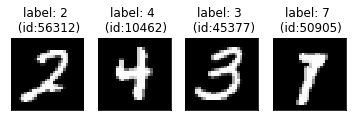

In [127]:
fig, ax = plt.subplots(nrows=1, ncols=4)

for col in ax:
    sample_id = np.random.randint(x_train.shape[0], size=1)[0]
    col.axes.get_xaxis().set_visible(False)
    col.axes.get_yaxis().set_visible(False)
    col.imshow(array_to_img(x_train[sample_id]))
    col.title.set_text('label: %s \n (id:%s)' % (np.argmax(y_train[sample_id]),sample_id))


In [ ]:
# using a generator 
# this is a sample code. does not work in this example. 
def testmodel(epoch, logs):
    predx, predy = next(data_iterator)
    
    predout = model.predict(
        predx,
        batch_size=BatchSize
    )

    print("Input\n")
    print(predx)
    print("Target\n")
    print(predy)
    print("Prediction\n")
    print(predout)
    

In [130]:
# for this example 
def testmodel(epoch, logs):

    print('***')
    
    fig, ax = plt.subplots(nrows=1, ncols=4)

    for col in ax:
        sample_id = np.random.randint(x_train.shape[0], size=1)[0]
        
        pred = model.predict(x_train[sample_id].reshape([-1,28,28,1]))
        pred = np.argmax(pred)
        
        col.axes.get_xaxis().set_visible(False)
        col.axes.get_yaxis().set_visible(False)
        col.imshow(array_to_img(x_train[sample_id]))
        col.title.set_text('label: %s \n (pred:%s)' % (np.argmax(y_train[sample_id]),pred))

    plt.show()
    
lbCallBack = LambdaCallback(on_epoch_end=testmodel)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 1000 samples, validate on 10000 samples
Epoch 1/4
1000/1000 [==============================] - 5s 5ms/step - loss: 2.0586 - acc: 0.3150 - val_loss: 1.4325 - val_acc: 0.6307
***


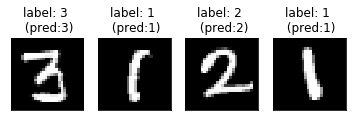

Epoch 2/4
1000/1000 [==============================] - 4s 4ms/step - loss: 1.3067 - acc: 0.5880 - val_loss: 0.7363 - val_acc: 0.7756
***


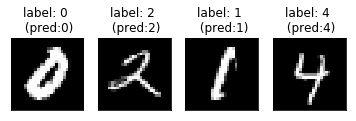

Epoch 3/4
1000/1000 [==============================] - 4s 4ms/step - loss: 0.8243 - acc: 0.7590 - val_loss: 0.4898 - val_acc: 0.8581
***


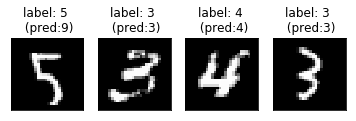

Epoch 4/4
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5156 - acc: 0.8470 - val_loss: 0.5651 - val_acc: 0.8135
***


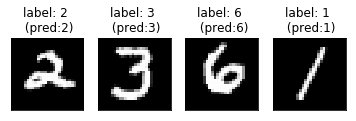

Test loss: 0.5651315957784653
Test accuracy: 0.8135


In [131]:
batch_size = 128
num_classes = 10
epochs = 4 

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train[:1000], y_train[:1000],
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          ###############################################################
          callbacks=[tbCallBack,lbCallBack]
          ###############################################################
         )

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])